In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Introduction

### [DIGIT Recognizer](https://www.kaggle.com/c/digit-recognizer)
<img src="images/front_page.png" style="width:350px;height:200px;">

# Data load & Pretreatment

In [2]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [3]:
df_train.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test.tail()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
dfY = df_train["label"]
dfY = pd.get_dummies(dfY)
dfY = dfY.as_matrix().reshape(len(dfY), -1).T

In [6]:
dfX = df_train.drop("label", axis = 1)
dfX /= np.max(np.max(dfX))
dfX = dfX.as_matrix().reshape(len(dfX), -1).T

In [7]:
df_test /= np.max(np.max(df_test))
df_test = df_test.as_matrix().reshape(len(df_test), -1).T

#### Normalizing inputs

In [8]:
dfX = (dfX - np.mean(dfX)) / np.std(dfX)
df_test = (df_test - np.mean(df_test)) / np.std(df_test)

In [9]:
del df_train

# EDA

#### data shape

In [10]:
np.shape(dfX), np.shape(dfY), np.shape(df_test)

((784, 42000), (10, 42000), (784, 28000))

#### train set images

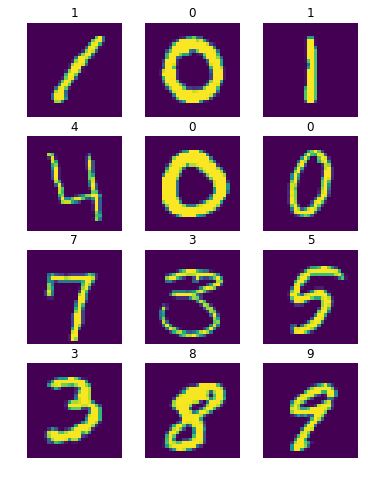

In [11]:
plt.figure(figsize=(6, 8))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.imshow(dfX[:, i].reshape(28,28))
    plt.axis('off')
    plt.title(np.where(dfY[:, i] == 1)[0][0])
plt.show()

#### test set images

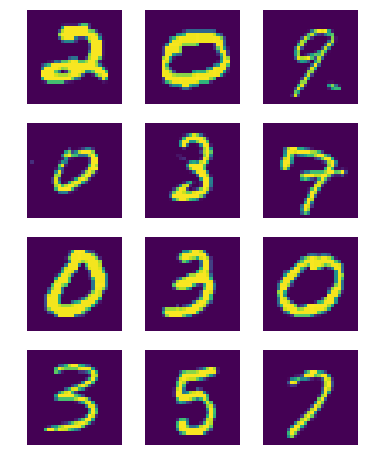

In [12]:
plt.figure(figsize=(6, 8))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.imshow(df_test[:, i].reshape(28,28))
    plt.axis('off')
plt.show()

#### labels distribution

[4132 4684 4177 4351 4072 3795 4137 4401 4063 4188]


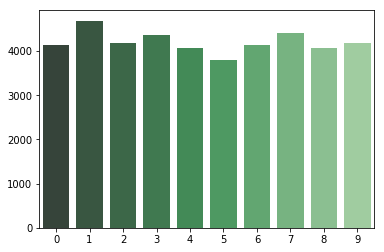

In [13]:
sns.barplot(list(range(10)), np.sum(dfY, axis=1), palette='Greens_d')
print(np.sum(dfY, axis=1))

In [14]:
#check None Value
# assert(dfX.isnull().any().count() == np.shape(dfX)[1])
# assert(dfY.isnull().any().count() == np.shape(dfY)[1])

# function

#### initialize layer sizes

In [15]:
def layer_sizes(dfX, dfY):
    """
    Arguments:
    dfX -- input dataset of shape (input size, number of examples)
    dfY -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_hi -- the size of the hidden layer
    n_y -- the size of the output layer
    """

    n_x = dfX.shape[0]      # size of input layer
    n_h1 = 128
    n_h2 = 64
    n_h3 = 64
    n_y = dfY.shape[0]      # size of output layer
    layer_dims = (n_x, n_h1, n_h2, n_h3, n_y)
    
    return layer_dims

In [16]:
layer_dims = layer_sizes(dfX, dfY)
layer_dims

(784, 128, 64, 64, 10)

$$\sqrt{\frac{2}{\text{dimension of the previous layer}}}$$

#### initialize parameters

In [17]:
def initialize_parameters_he(layer_dims):
    """
    Argument:
    layer_dims -- output of layer_sizes()
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h1, n_x)
                    b1 -- bias vector of shape (n_h1, 1)
                    W2 -- weight matrix of shape (n_h2, n_h1)
                    b2 -- bias vector of shape (n_h2, 1)
                    W3 -- weight matrix of shape (n_y, n_h2)
                    b3 -- bias vector of shape (n_y, 1)
    """
    np.random.seed(0)
    
    parameters = {}
    L = len(layer_dims)   
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2.0 / layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
    
    return parameters

In [18]:
parameters = initialize_parameters_he(layer_dims)
# parameters

In [19]:
for i in parameters.keys():
    print("shape {} :".format(i), np.shape(parameters[i]))

shape W1 : (128, 784)
shape b1 : (128, 1)
shape W2 : (64, 128)
shape b2 : (64, 1)
shape W3 : (64, 64)
shape b3 : (64, 1)
shape W4 : (10, 64)
shape b4 : (10, 1)


#### linear_forward

In [20]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    Z = np.dot(W, A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [21]:
A, W, b = dfX, parameters['W1'], parameters['b1']
Z, linear_cache = linear_forward(A, W, b)
print(Z.shape)
print("Z = " + str(Z))

(128, 42000)
Z = [[-0.10228664 -5.9642208  -0.43389473 ..., -2.60185159 -2.41329243
  -1.52039894]
 [ 2.82584809  0.81807472 -1.14001134 ..., -1.04033409  0.45633203
   0.0748405 ]
 [-0.65174132  1.07281173 -0.99581919 ..., -1.08544987 -0.56923968
  -1.60624157]
 ..., 
 [-1.43458059 -0.33789312 -0.36951042 ..., -0.23611781 -1.11874615
  -0.9343949 ]
 [-1.1928547   3.41546009 -0.86262532 ..., -0.5409382   0.31365376
  -0.47623487]
 [ 0.4701796  -3.09390347 -0.41718899 ..., -1.71826461 -2.38829194
  -1.85956903]]


#### activation funtions

In [22]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    
    assert(A.shape == Z.shape)
    
    cache = Z
    
    return A, cache

In [23]:
sigmoid(Z)[0]

array([[ 0.47445061,  0.00256246,  0.39319669, ...,  0.06901935,
         0.08216468,  0.17940278],
       [ 0.94405673,  0.6938275 ,  0.24231828, ...,  0.26108554,
         0.61214367,  0.5187014 ],
       [ 0.34259724,  0.74513126,  0.26976421, ...,  0.25247607,
         0.36141228,  0.16711108],
       ..., 
       [ 0.19238598,  0.41632135,  0.40865933, ...,  0.44124328,
         0.24624393,  0.28203394],
       [ 0.23274876,  0.96818422,  0.29679113, ...,  0.36796936,
         0.57777685,  0.3831416 ],
       [ 0.61542627,  0.04335943,  0.3971896 , ...,  0.15209483,
         0.08406986,  0.13475329]])

In [24]:
def relu(Z):
    """
    Implement the RELU activation in numpy.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

In [25]:
relu(Z)[0]

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.82584809,  0.81807472,  0.        , ...,  0.        ,
         0.45633203,  0.0748405 ],
       [ 0.        ,  1.07281173,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  3.41546009,  0.        , ...,  0.        ,
         0.31365376,  0.        ],
       [ 0.4701796 ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [26]:
def softmax(Z):
    """
    Implement the softmax activation in numpy.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.exp(Z) / sum(np.exp(Z))
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

In [27]:
softmax(Z)[0]

array([[  3.38415497e-03,   4.63491941e-06,   2.48005737e-03, ...,
          1.45534628e-04,   2.73615890e-04,   7.17976964e-04],
       [  6.32590986e-02,   4.08842191e-03,   1.22405006e-03, ...,
          6.93625055e-04,   4.82395651e-03,   3.53927409e-03],
       [  1.95355260e-03,   5.27456424e-03,   1.41390761e-03, ...,
          6.63027037e-04,   1.72982929e-03,   6.58915201e-04],
       ..., 
       [  8.92981234e-04,   1.28684209e-03,   2.64498661e-03, ...,
          1.55021332e-03,   9.98517367e-04,   1.29005679e-03],
       [  1.13716256e-03,   5.49017065e-02,   1.61534911e-03, ...,
          1.14290373e-03,   4.18252936e-03,   2.03978880e-03],
       [  5.99886619e-03,   8.17721027e-05,   2.52183657e-03, ...,
          3.52130212e-04,   2.80542647e-04,   5.11458984e-04]])

#### linear activation forward

In [28]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu" or "tanh" or "softmax"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    Z, linear_cache = linear_forward(A_prev, W, b)  
    
    if activation == "sigmoid":
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        A, activation_cache = relu(Z)
        
    elif activation == "softmax":
        A, activation_cache = softmax(Z)   
        
    elif activation == "tanh":
        A, activation_cache = np.tanh(Z), Z
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    
    cache = (linear_cache, activation_cache)  

    return A, cache     # g(Z), ((A, W, b), g(Z))

In [29]:
A_prev, W, b = dfX, parameters['W1'], parameters['b1']

In [30]:
linear_activation_forward(A_prev, W, b, activation='tanh')[0]

array([[-0.1019314 , -0.9999868 , -0.40857104, ..., -0.98906774,
        -0.98409974, -0.90876716],
       [ 0.99300146,  0.67402062, -0.81441791, ..., -0.77801996,
         0.42709001,  0.07470109],
       [-0.57284104,  0.79051819, -0.75983273, ..., -0.79521138,
        -0.51480068, -0.92260269],
       ..., 
       [-0.89260148, -0.32559516, -0.35356341, ..., -0.23182552,
        -0.80713234, -0.73263637],
       [-0.83146212,  0.9978426 , -0.69760783, ..., -0.49369782,
         0.3037574 , -0.44322318],
       [ 0.43834442, -0.99589977, -0.39455967, ..., -0.93765373,
        -0.98329131, -0.952639  ]])

In [31]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the LINEAR -> RELU -> LINEAR  TANH -> LINEAR -> SIGMOID -> LINEAR -> SOFTMAX computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_he()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2
    
#     for l, act in zip(range(1, L), ['relu', 'tanh', 'sigmoid']):
    for l in range(1, L):
        A_prev = A 
#         A, cache = linear_activation_forward(A_prev, parameters['W{}'.format(l)], parameters['b{}'.format(l)], activation = act)
        A, cache = linear_activation_forward(A_prev, parameters['W{}'.format(l)], parameters['b{}'.format(l)], activation = 'relu')
        caches.append(cache)
    
    AL, cache = linear_activation_forward(A, parameters['W{}'.format(L)], parameters['b{}'.format(L)], activation = "softmax")
    caches.append(cache)
    
    assert(AL.shape == (10, X.shape[1]))
            
    return AL, caches    # A[4], ((A[0], W1, b1, (Z1)), (A[1], W2, b2, (Z2)), (A[2], W3, b3, (Z3)), (A[3], W4, b4, (Z4)))

In [32]:
A4, caches = L_model_forward(dfX, parameters)
print(A4.shape)
A4

(10, 42000)


array([[ 0.0769263 ,  0.07520451,  0.14874251, ...,  0.04118916,
         0.06077849,  0.11304059],
       [ 0.13301316,  0.04549142,  0.02048419, ...,  0.00475803,
         0.0734537 ,  0.11928567],
       [ 0.07089929,  0.00875754,  0.0365227 , ...,  0.01041019,
         0.09523808,  0.06560213],
       ..., 
       [ 0.04113581,  0.03967157,  0.02875263, ...,  0.05381069,
         0.06353326,  0.04422012],
       [ 0.17019676,  0.30524569,  0.14447443, ...,  0.11734197,
         0.24674606,  0.21256956],
       [ 0.06959346,  0.05049661,  0.04252543, ...,  0.0180457 ,
         0.07324914,  0.02411527]])

### Loss function

$$ L(\hat{y},y) = -\frac{1}{m}\Sigma_jY_jlog\hat{y}_j $$

$$ J = \frac{1}{m}\Sigma_{i=1}^mL(\hat{y^{(i)}},y^{(i)}) + \frac{\lambda}{2m}\Sigma_{l=1}^L\|W^{[l]}\|^2$$

In [33]:
def compute_cost_with_regularization(AL, Y, caches, Lambd=1):
    """
    Implement the cost function.

    Arguments:
    AL -- probability matrix, output of the forward propagation (L_model_forward())
    Y -- ture"label" numpy ndarray
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer
    Lambd -- regularization parameter
    
    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]
    
    L2_regularization_cost = (Lambd * np.sum([np.sum(caches[i][0][1]**2) for i in range(len(caches))])) / (2*m)
    cross_entropy_cost = -1/m * np.sum(np.sum(Y * np.log(AL), axis = 1, keepdims=True)) 
    
    cost = cross_entropy_cost + L2_regularization_cost
    
    assert(cost.shape == ())
    
    return cost

In [34]:
cost = compute_cost_with_regularization(A4, dfY, caches, Lambd=1)
cost

2.8349683871792428

### Backword propagation 
+ input : $da^{[l]}$ 
+ output : $da^{[l-1]}, dW^{[l]}, db^{[l]}$

$$ dZ^{[l]} = da^{[l]} * g^{[l]'}(Z^{[l]}) $$

$$ dW^{[l]} = dZ^{[l]} * a^{[l-1]} + \frac{\lambda}{m}W^{[l]} $$

$$ db^{[l]} = dZ^{[l]} $$

$$ da^{[l-1]} = W^{[l]T} \bullet dz^{[l]}  $$

$$ dZ^{[l]} = W^{[l+1]T} \bullet dZ^{[l+1]} * g^{[l]'}(Z^{[l]}) $$

In [35]:
def linear_backward(dZ, cache, Lambd=1):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer
    Lambd -- regularization parameter, integer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """

    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1 / m * np.dot(dZ,A_prev.T) + Lambd * W /m
    db = 1 / m * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

#### 4-layer (softmax)
+ differential

$$ a^{[4]}_i = P_i = \frac{e^{Z^{[4]}_i}}{\Sigma_i e^{Z^{[4]}_i}} $$

$$ g^{[4]'}_i(Z^{[4]}_i) = \frac{\partial g(Z^{[4]}_i)}{\partial Z^{[4]}_i} = P_i(1 - P_i)$$

$$ g^{[4]'}_j(Z^{[4]}_i) = \frac{\partial g(Z^{[4]}_i)}{\partial Z^{[4]}_j} = - P_i * P_j $$

+ input
$$ da^{[4]} = \frac{\partial L}{\partial a^{[4]}_i} = P_i - y_i$$

+ output

$$ dZ^{[4]}_i = \frac{\partial L}{\partial a^{[4]}_i}\frac{\partial a^{[4]}_i}{\partial Z^{[4]}_i} = (P_i - y_i){P_i(1 - P_i)}$$

$$ da^{[3]} = W^{[4]T} \bullet dZ^{[4]}_i  $$

$$ dW^{[4]} = dZ^{[4]}_i * a^{[3]} + \frac{\lambda}{m}W^{[4]}$$

$$ db^{[4]} = dZ^{[4]}_i $$

In [36]:
def softmax_backward(dA, cache):
    """
    Implement the backward propagation for a single Softmax unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    p, _ = softmax(Z)
    dZ = dA * p * (1 - p)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

#### 3-layer (sigmoid)
+ differential
$$ a^{[3]}_i = \frac{1}{1 + e^{Z^{[3]}_i}} $$

$$ g^{[3]'}(Z^{[3]}_i) = \frac{\partial g(Z^{[3]}_i)}{\partial Z^{[3]}_i} = \frac{1}{1 + e^{Z^{[3]}_i}}{(1 -  \frac{1}{1 + e^{Z^{[3]}_i}})} = a^{[3]}_i(1 - a^{[3]}_i)$$

+ input
$$ da^{[3]} = \frac{\partial L}{\partial a^{[3]}_i} = W^{[4]T} \bullet dZ^{[4]}_i  $$

+ output

$$ dZ^{[3]}_i = \frac{\partial L}{\partial a^{[3]}_i}\frac{\partial a^{[3]}_i}{\partial Z^{[3]}_i} = W^{[4]T} \bullet dZ^{[4]}_i * a^{[3]}_i(1 - a^{[3]}_i)$$

$$ da^{[2]} = W^{[3]T} \bullet dZ^{[3]}_i  $$

$$ dW^{[3]} = dZ^{[3]}_i * a^{[2]} + \frac{\lambda}{m}W^{[3]}$$

$$ db^{[3]} = dZ^{[3]}_i $$

In [37]:
def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s, _ = sigmoid(Z)
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

#### 2-layer (tanh)
+ differential
$$ a^{[2]}_i = tanh(Z^{[2]}_i) = \frac{1 - e^{Z^{[2]}_i}}{1 + e^{Z^{[2]}_i}} $$

$$ g^{[2]'}(Z^{[2]}_i) = \frac{\partial a^{[2]}_i}{\partial Z^{[2]}_i} = (1 - \frac{1 - e^{Z^{[2]}_i}}{1 + e^{Z^{[2]}_i}})(1 + \frac{1 - e^{Z^{[2]}_i}}{1 + e^{Z^{[2]}_i}}) = (1 - a^{[2]}_i)(1 + a^{[2]}_i)$$

+ input
$$ da^{[2]} = \frac{\partial L}{\partial a^{[2]}_i} = W^{[3]T} \bullet dZ^{[3]}_i  $$

+ output
$$ dZ^{[2]}_i = \frac{\partial L}{\partial a^{[2]}_i}\frac{\partial a^{[2]}_i}{\partial Z^{[2]}_i} = W^{[3]T} \bullet dZ^{[3]}_i * (1 - a^{[2]}_i)(1 + a^{[2]}_i)$$

$$ da^{[1]} = W^{[2]T} \bullet dZ^{[2]}_i  $$

$$ dW^{[2]} = dZ^{[2]}_i * a^{[1]} + \frac{\lambda}{m}W^{[2]}$$

$$ db^{[2]} = dZ^{[2]}_i $$

In [38]:
def tanh_backward(dA, cache):
    """
    Implement the backward propagation for a single Tanh unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    t = np.tanh(Z)
    dZ = dA * (1 - t) * (1 + t)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

#### 1-layer (relu)
+ differential

$$ a^{[1]}_i = max({0, Z^{[1]}_i})$$

$$ g^{[1]'}(Z^{[1]}_i) = \frac{\partial a^{[1]}_i}{\partial Z^{[1]}_i} =\begin{cases}
0, & \mbox{if }Z^{[1]}_i \le 0 \\
1, & \mbox{if }Z^{[1]}_i > 0
\end{cases}$$

+ input
$$ da^{[1]} = W^{[2]T} \bullet dZ^{[2]}_i  $$

+ output
$$ dZ^{[1]}_i = \frac{\partial L}{\partial a^{[1]}_i}\frac{\partial a^{[1]}_i}{\partial Z^{[1]}_i} = \begin{cases}
0, & \mbox{if }Z^{[1]}_i \le 0 \\
 W^{[2]T} \bullet dZ^{[2]}_i, & \mbox{if }Z^{[1]}_i > 0
\end{cases}$$

$$ da^{[0]} = W^{[1]T} \bullet dZ^{[1]}_i  $$

$$ dW^{[1]} = dZ^{[1]}_i * a^{[0]} + \frac{\lambda}{m}W^{[1]}$$

$$ db^{[1]} = dZ^{[1]}_i $$

In [39]:
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) 
    
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [40]:
def linear_activation_backward(dA, cache, activation, Lambd=1):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu" or "tanh" or "softmax"
    Lambd -- regularization parameter, integer
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache, Lambd)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache, Lambd)
        
    elif activation == "tanh":
        dZ = tanh_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache, Lambd)
        
    elif activation == "softmax":
        dZ = softmax_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache, Lambd)
    
    return dA_prev, dW, db

In [41]:
dA_prev, dW, db = linear_activation_backward(dA=A4 - dfY, cache=caches[3], activation='softmax')
# dA_prev, dW, db

In [42]:
def L_model_backward(AL, dfY, caches, Lambd=1):
    """
    Implement the backward propagation for the LINEAR -> RELU -> LINEAR  TANH -> LINEAR -> SIGMOID -> LINEAR -> SOFTMAX group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- ture"label" numpy ndarray
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "softmax" (it's caches[L-1])
    Lambd -- regularization parameter, integer
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches)         
    m = AL.shape[1]
    dfY = dfY.reshape(AL.shape) 
    
    dAL = AL - dfY
    
    current_cache = caches[L-1]
    grads["dA" + str(L - 1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "softmax", Lambd=Lambd)
    
#     for l, act_func in zip(reversed(range(L-1)), ['sigmoid', 'tanh', 'relu']):
    for l in reversed(range(L-1)):
        current_cache = caches[l]
#         dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA"+str(l + 1)], current_cache, activation = act_func)
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA"+str(l + 1)], current_cache, activation = 'relu', Lambd=Lambd)
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [43]:
grads = L_model_backward(A4, dfY, caches)
# grads

#### initialize adam

In [44]:
def initialize_adam(parameters):
    """
    Initializes v and s as two python dictionaries with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters["W" + str(l)] = Wl
                    parameters["b" + str(l)] = bl
    
    Returns: 
    v -- python dictionary that will contain the exponentially weighted average of the gradient.
                    v["dW" + str(l)] = ...
                    v["db" + str(l)] = ...
    s -- python dictionary that will contain the exponentially weighted average of the squared gradient.
                    s["dW" + str(l)] = ...
                    s["db" + str(l)] = ...

    """
    
    L = len(parameters) // 2
    v = {}
    s = {}
    
    for l in range(L):
        v["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)
        s["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
        s["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)
    
    return v, s

In [45]:
v, s = initialize_adam(parameters)

In [46]:
def update_parameters(Y, parameters, grads, learning_rate, Lambd=1):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 
    m = Y.shape[1]
    
    for l in range(L):
        parameters["W" + str(l+1)] = (1 - ((learning_rate * Lambd) / m)) * parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l + 1)]
        
    return parameters

In [47]:
# parameters = update_parameters(dfY, parameters, grads, learning_rate=0.02)
# parameters

#### update parameters with adam

$$ V_{dW^{[l]}} = \beta_1 V_{dW^{[l]}} + (1 - \beta_1) dW^{[l]} , \beta_1 : momentom $$
$$ V_{dW^{[l]}}^{corrected} = \frac{V_{dW^{[l]}}}{1-(\beta_1)^t} $$

$$ S_{dW^{[l]}} = \beta_2 S_{dW^{[l]}} + (1 - \beta_2) (dW^{[l]})^2 , \beta_2 : RMSprop $$
$$ S_{dW^{[l]}}^{corrected} = \frac{S_{dW^{[l]}}}{1-(\beta_2)^t} $$

$$ W^{[l]} := W^{[l]} - \alpha \frac{V_{dW^{[l]}}^{corrected}}{\sqrt{S_{dW^{[l]}}^{corrected} + \epsilon}} $$

$$ V_{db^{[l]}} = \beta_1 V_{db^{[l]}} + (1 - \beta_1) db^{[l]} , \beta_1 : momentom $$
$$ V_{db^{[l]}}^{corrected} = \frac{V_{db^{[l]}}}{1-(\beta_1)^t} $$

$$ S_{db^{[l]}} = \beta_2 S_{db^{[l]}} + (1 - \beta_2) (db^{[l]})^2 , \beta_2 : RMSprop $$
$$ S_{db^{[l]}}^{corrected} = \frac{S_{db^{[l]}}}{1-(\beta_2)^t} $$

$$ b^{[l]} := b^{[l]} - \alpha \frac{V_{db^{[l]}}^{corrected}}{\sqrt{S_{db^{[l]}}^{corrected} + \epsilon}} $$

In [48]:
def update_parameters_with_adam(Y, parameters, grads, v, s, t = 2, learning_rate = 0.01, Lambd=1, \
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    Update parameters using Adam
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    learning_rate -- the learning rate, scalar.
    beta1 -- Exponential decay hyperparameter for the first moment estimates 
    beta2 -- Exponential decay hyperparameter for the second moment estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates

    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    """
    
    L = len(parameters) // 2   
    m = Y.shape[1]
    v_corrected = {}                         
    s_corrected = {}                         
    
    for l in range(L):
        v["dW" + str(l+1)] = beta1 * v["dW" + str(l+1)] + (1 - beta1) * grads["dW" + str(l+1)]
        v["db" + str(l+1)] = beta1 * v["db" + str(l+1)] + (1 - beta1) * grads["db" + str(l+1)]

        v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)] / (1 - (beta1 ** t))
        v_corrected["db" + str(l+1)] = v["db" + str(l+1)] / (1 - (beta1 ** t))

        s["dW" + str(l+1)] = beta2 * s["dW" + str(l+1)] + (1 - beta2) * (grads["dW" + str(l+1)] ** 2)
        s["db" + str(l+1)] = beta2 * s["db" + str(l+1)] + (1 - beta2) * (grads["db" + str(l+1)] ** 2)

        s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)] / (1 - (beta2 ** t))
        s_corrected["db" + str(l+1)] = s["db" + str(l+1)] / (1 - (beta2 ** t))
        
        parameters["W" + str(l+1)] = (1 - ((learning_rate * Lambd) / m)) * parameters["W" + str(l+1)] - \
                                     learning_rate * v_corrected["dW" + str(l+1)] / (np.sqrt(s_corrected["dW" + str(l+1)]) + epsilon)
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - \
                                     learning_rate * v_corrected["db" + str(l+1)] / (np.sqrt(s_corrected["db" + str(l+1)]) + epsilon)

    return parameters, v, s

In [49]:
parameters_adam, v, s = update_parameters_with_adam(dfY, parameters, grads, v, s, t=1, learning_rate = 0.01, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8)
# parameters_adam

#### random mini batches

In [50]:
def random_mini_batches(dfX, dfY, mini_batch_size = 128, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    dfX -- input dataset of shape (input size, number of examples)
    dfY -- labels of shape (output size, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)           
    m = dfX.shape[1]                  
    mini_batches = []
        
    permutation = list(np.random.permutation(m))
    shuffled_X = dfX[:, permutation]
    shuffled_Y = dfY[:, permutation]

    num_complete_minibatches = int(m/mini_batch_size)
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : (k+1) * mini_batch_size ]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : (k+1) * mini_batch_size ]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, mini_batch_size * num_complete_minibatches : m]
        mini_batch_Y = shuffled_Y[:, mini_batch_size * num_complete_minibatches : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches # [(minibatch_X, minibatch_Y), x num_complete_minibatches]

In [51]:
mini_batches = random_mini_batches(dfX, dfY, mini_batch_size = 128, seed = 0)
len(mini_batches)

329

# modeling

In [52]:
def L_layer_model(dfX, dfY, learning_rate = 0.0075, mini_batch_size = 64, num_iterations = 3000, print_cost=False, Lambd=1):
    """
    Implements a L-layer neural network: [LINEAR -> RELU] x 3 -> LINEAR -> SOFTMAX.
    
    Arguments:
    dfX -- data, numpy ndarray of shape (num_px * num_px, number of examples)
    dfY -- labels of shape (output size, number of examples)
    learning_rate -- learning rate of the gradient descent update rule
    mini_batch_size -- size of the mini-batches, integer
    num_iterations -- number of iterations of the optimization loop
    print_cost -- bool, if True, it prints the cost every 100 steps
    Lambd -- regularization parameter, integer
    beta1 -- Exponential decay hyperparameter for the first moment estimates 
    beta2 -- Exponential decay hyperparameter for the second moment estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(0)
    costs = []
    
    layers_dims = layer_sizes(dfX, dfY)
    
    parameters = initialize_parameters_he(layers_dims)
    
    mini_batches = random_mini_batches(dfX, dfY, mini_batch_size, seed=0)
    
    for i in range(0, num_iterations):
        
        for mini_batch in mini_batches:    
            
            (minibatch_X, minibatch_Y) = mini_batch
            
            AL, caches = L_model_forward(minibatch_X, parameters)

            cost = compute_cost_with_regularization(AL, minibatch_Y, caches, Lambd=Lambd)

            grads = L_model_backward(AL, minibatch_Y, caches, Lambd=Lambd)
            
            parameters = update_parameters(dfY, parameters, grads, learning_rate, Lambd)
            
        if print_cost and i % 10 == 0:
            print("Cost after iteration %i : %f" %(i, cost))
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [66]:
def L_layer_model_adam(dfX, dfY, learning_rate = 0.0075, mini_batch_size = 64, num_iterations = 3000, print_cost=False, \
                       adam=False, Lambd=1, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, seed=0):
    """
    Implements a L-layer neural network: [LINEAR -> RELU] x 3 -> LINEAR -> SOFTMAX.
    
    Arguments:
    dfX -- data, numpy ndarray of shape (num_px * num_px, number of examples)
    dfY -- labels of shape (output size, number of examples)
    learning_rate -- learning rate of the gradient descent update rule
    mini_batch_size -- size of the mini-batches, integer
    num_iterations -- number of iterations of the optimization loop
    print_cost -- bool, if True, it prints the cost every 100 steps
    Lambd -- regularization parameter, integer
    beta1 -- Exponential decay hyperparameter for the first moment estimates 
    beta2 -- Exponential decay hyperparameter for the second moment estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(seed)
    costs = []
    
    layers_dims = layer_sizes(dfX, dfY)
    
    parameters = initialize_parameters_he(layers_dims)
    
    if adam:
        t = 0
        v, s = initialize_adam(parameters)
    
    mini_batches = random_mini_batches(dfX, dfY, mini_batch_size, seed=seed)
    
    for i in range(0, num_iterations):
        
        for mini_batch in mini_batches:    
            
            (minibatch_X, minibatch_Y) = mini_batch
            
            AL, caches = L_model_forward(minibatch_X, parameters)

            cost = compute_cost_with_regularization(AL, minibatch_Y, caches, Lambd=Lambd)

            grads = L_model_backward(AL, minibatch_Y, caches, Lambd=Lambd)
            
            if adam:
                t = t + 1
                parameters, v, s = update_parameters_with_adam(dfY, parameters, grads, v, s, t, learning_rate, Lambd,\
                                                               beta1, beta2,  epsilon)
            else:
                parameters = update_parameters(dfY, parameters, grads, learning_rate, Lambd)
            
        if print_cost and i % 10 == 0:
            print("Cost after iteration %i : %f" %(i, cost))
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [54]:
%%time
# parameters = L_layer_model(dfX, dfY, learning_rate = 0.01, mini_batch_size = 128, num_iterations = 300, print_cost=True)

Cost after iteration 0 : 16.964849
Cost after iteration 10 : 10.873290
Cost after iteration 20 : 7.065330


KeyboardInterrupt: 

In [57]:
%%time
parameters = L_layer_model_adam(dfX, dfY, learning_rate = 0.01, mini_batch_size = 128, num_iterations = 100, print_cost=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in multiply
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in maximum
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less_equal
  app.launch_new_instance()


Cost after iteration 0 : nan


KeyboardInterrupt: 

In [ ]:
# parameters

In [ ]:
test, _ = L_model_forward(df_test, parameters)

In [ ]:
test = pd.DataFrame(pd.DataFrame(test).idxmax(), columns=['Label'])
test.index.name='ImageId'
test.index += 1 
test.tail()

In [ ]:
test.to_csv('test.csv')

## 개선사항 
+ ~~L2 Regularization~~
+ ~~Normalizing inputs~~
+ ~~He initialization~~
+ ~~Mini-batch~~
+ ~~Adam optimization~~
+ Dropout vs Batch Normalizing
+ Hyperparameter tuning